# **Plant Seedlings Classification**



### **Context**

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

### **Objective:**

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

### **Data Description:**

This dataset contains images of unique plants belonging to 12 different species.


- The data file names are:
  - images.npy
  - Label.csv


- Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.
- The goal of the project is to create a classifier capable of determining a plant's species from an image.


**List of Plant species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

## **Importing the necessary libraries**

In [1]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **Reading the dataset**

In [2]:
# Mount Google drive to access the dataset (monkeys_dataset.zip)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/Colab Notebooks/CNN/Project/images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CNN/Project/Labels.csv')

In [4]:
# checking the portion of each class
labels.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

In [5]:
# percentage of each class
labels.value_counts(normalize=True)*100

Label                    
Loose Silky-bent             13.768421
Common Chickweed             12.863158
Scentless Mayweed            10.863158
Small-flowered Cranesbill    10.442105
Fat Hen                      10.000000
Charlock                      8.210526
Sugar beet                    8.105263
Cleavers                      6.042105
Black-grass                   5.536842
Shepherds Purse               4.863158
Common wheat                  4.652632
Maize                         4.652632
dtype: float64

## **Overview of the dataset**


Let's print the shape of the images and labels 

In [6]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

## Plotting images using OpenCV and matplotlib

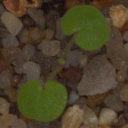

In [7]:
cv2_imshow(images[5])

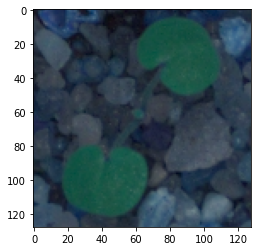

In [8]:
plt.imshow(images[5])

- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- Now we will convert these BGR images to RGB images so we could interpret them easily.

In [9]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

## **Exploratory Data Analysis** 

In [10]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

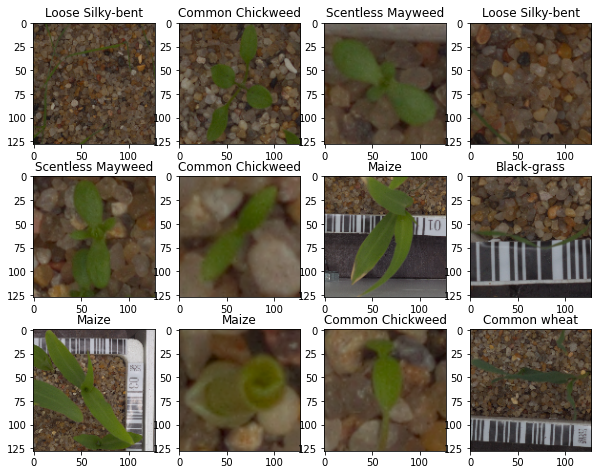

In [11]:
plot_images(images,labels)

<b> Checking for data imbalance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

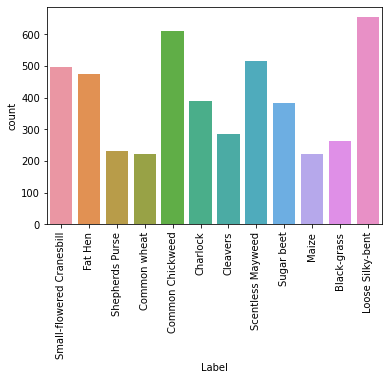

In [12]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical')

### **Insights from EDA**

- There are 4750 RGB images of shape 128 x 128 X 3, each image having 3 channels.
- As you see from the count plot, the dataset is imbalanced.
- Loose Silky-bent and Common Chickweed are top categories with more than 600 images for each categories in the dataset. 
- Small-flowered Creanesbill, Fat Hen and Scentless Mayweed with 500 images in each categories.
- Charlock and Sugar beet has ~400 images in each category.
- Remaining five categories have images in range of 200-300 images.
- Size of the images should be reduced since it is expensive to train on these larger images.
- Class imbalance should be treated by increasing the weights of the minority class.

## Data Pre-Processing

### Resizing images 
As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [13]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

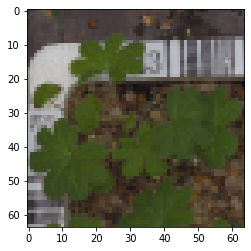

In [14]:
plt.imshow(images_decreased[3])

## Visualizing images using Gaussian Blur 

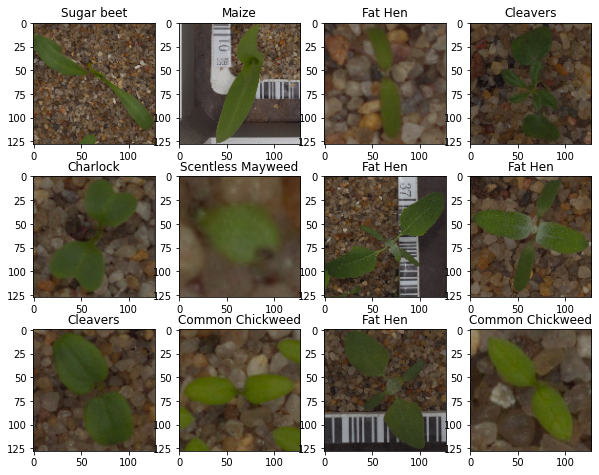

In [15]:
plot_images(images,labels)

In [16]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))


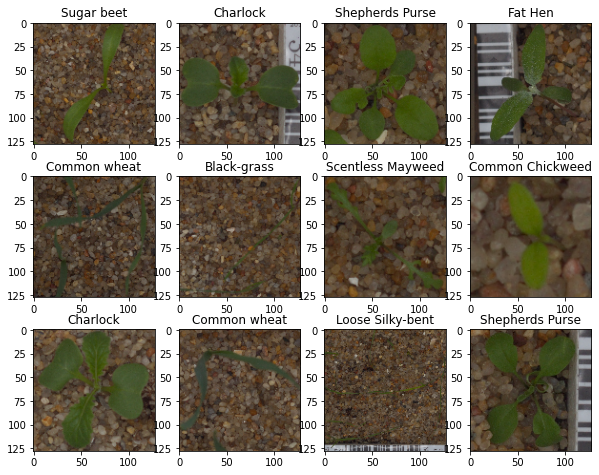

In [17]:
plot_images(images,labels)

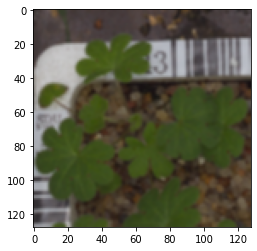

In [18]:
plt.imshow(images_gb[3])

- It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

## **Splitting the dataset**

- As we have less images in our dataset, we will only use 10% of our data for testing, 90% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into two parts, train and test.


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=1,stratify=labels) 

In [20]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(4275, 64, 64, 3) (4275, 1)
(475, 64, 64, 3) (475, 1)


**To treat the class imbalance by increasing the weights of the minority classes**

In [21]:
from sklearn.utils import class_weight

labelList = labels.Label.unique()
class_weights = class_weight.compute_class_weight(class_weight = "balanced",
                                                  classes = np.array(labelList),
                                                  y = y_train.values.reshape(-1)
                                                  )
class_weights = dict(zip(np.array(range(len(labelList))), class_weights))
#print calculated class weights
class_weights

{0: 0.7987668161434978,
 1: 0.8343091334894613,
 2: 1.7127403846153846,
 3: 1.7902010050251256,
 4: 0.6477272727272727,
 5: 1.014957264957265,
 6: 1.380813953488372,
 7: 0.7677801724137931,
 8: 1.026657060518732,
 9: 1.7902010050251256,
 10: 1.5031645569620253,
 11: 0.6048387096774194}

## **Making the data compatible:**

- Convert labels from names to one hot vectors
- Normalizing the values

In [22]:
## Encoding the target labels

In [23]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_test_encoded=enc.transform(y_test)

In [24]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(4275, 64, 64, 3) (4275, 1)
(475, 64, 64, 3) (475, 1)


## Data Normalization
Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [25]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0


## **Model Building - Convolutional Neural Network (CNN)**
Let's create a CNN model sequentially, where we will be adding the layers one after another.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data. 

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.

In [26]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [27]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Now, let's build a **CNN Model** with the following 2 main parts - <br>

1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers** for prediction.<br><br>


In [28]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

### <b> Fitting the model on the train data

In [29]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_split=0.10,
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 31s - loss: 2.4683 - accuracy: 0.1175 - val_loss: 2.4612 - val_accuracy: 0.2079 - 31s/epoch - 257ms/step
Epoch 2/30
121/121 - 30s - loss: 2.4127 - accuracy: 0.1300 - val_loss: 2.2966 - val_accuracy: 0.2757 - 30s/epoch - 247ms/step
Epoch 3/30
121/121 - 34s - loss: 2.2864 - accuracy: 0.2139 - val_loss: 2.2165 - val_accuracy: 0.2850 - 34s/epoch - 277ms/step
Epoch 4/30
121/121 - 30s - loss: 2.2250 - accuracy: 0.2212 - val_loss: 2.1187 - val_accuracy: 0.2850 - 30s/epoch - 245ms/step
Epoch 5/30
121/121 - 29s - loss: 2.2045 - accuracy: 0.2215 - val_loss: 2.1011 - val_accuracy: 0.2850 - 29s/epoch - 244ms/step
Epoch 6/30
121/121 - 29s - loss: 2.2041 - accuracy: 0.2178 - val_loss: 2.1111 - val_accuracy: 0.2874 - 29s/epoch - 242ms/step
Epoch 7/30
121/121 - 29s - loss: 2.1784 - accuracy: 0.2212 - val_loss: 2.0642 - val_accuracy: 0.2827 - 29s/epoch - 242ms/step
Epoch 8/30
121/121 - 29s - loss: 2.1780 - accuracy: 0.2217 - val_loss: 2.0753 - val_accuracy: 0.2944 - 29s/epoch - 242

### **Model Evaluation**

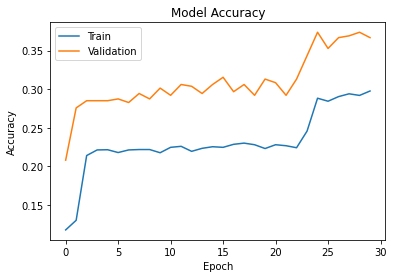

In [30]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 


* We can see from the above plot that **validation accuracy is better than training accuracy.**

 



### **Evaluating the model on test data**

In [31]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 1.8311 - accuracy: 0.3642 - 840ms/epoch - 56ms/step


### **Generating the predictions using test data**

In [32]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 1s 61ms/step


In [33]:
y_pred

array([[3.78895663e-02, 5.16788568e-04, 1.32259429e-01, ...,
        3.99198179e-04, 1.21609948e-03, 4.47489649e-01],
       [2.95208156e-04, 2.28634670e-01, 5.11248745e-02, ...,
        5.89115508e-02, 5.70393443e-01, 2.53939256e-02],
       [4.62713391e-02, 2.85414010e-02, 9.00693759e-02, ...,
        2.29052957e-02, 2.69162711e-02, 1.38541654e-01],
       ...,
       [2.17848551e-02, 9.86914039e-02, 7.51872957e-02, ...,
        6.68185353e-02, 8.80085081e-02, 8.08450207e-02],
       [9.36979987e-03, 1.66433766e-01, 9.15437788e-02, ...,
        8.71689767e-02, 1.95083112e-01, 8.01682994e-02],
       [5.85185587e-02, 1.30582983e-02, 8.50607529e-02, ...,
        1.14288125e-02, 1.26711018e-02, 1.57044202e-01]], dtype=float32)

### **Plotting the Confusion Matrix**


- The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
- The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
- We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

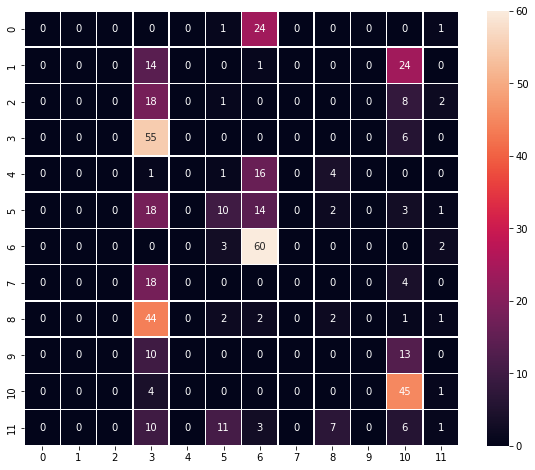

In [34]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>

- Model performance is under fitting, failed to predict most of the plant species.
- Classes 0-2, 4, 7 and 9 are not identified at all.
- Classes 3, 6 and 10 are identified better but still has lot of confusion on these classes.

# Model-2

As we can see, our initial model appears to underfit. Therefore we'll try to address this problem with data augmentation and Batch Normalization to check if we can improve the model's performance.

## **Data Augmentation**

In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is **Data Augmentation**. CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. <br> Taking this attribute into account, we can augment the images using the techniques listed below - <br>
**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>

Remember, **data augmentation should not be used in the validation/test data set**.

In [35]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [36]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20, 
                              fill_mode='nearest'
                              )

In [37]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                        

In [38]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history = model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_test_normalized, y_test_encoded),
                    verbose=1)

Epoch 1/25
66/66 [==============================] - 37s 557ms/step - loss: 2.1431 - accuracy: 0.2220 - val_loss: 2.3715 - val_accuracy: 0.2400
Epoch 2/25
66/66 [==============================] - 36s 552ms/step - loss: 1.6930 - accuracy: 0.4094 - val_loss: 2.2135 - val_accuracy: 0.2884
Epoch 3/25
66/66 [==============================] - 38s 583ms/step - loss: 1.4944 - accuracy: 0.4747 - val_loss: 2.0575 - val_accuracy: 0.3284
Epoch 4/25
66/66 [==============================] - 36s 550ms/step - loss: 1.3524 - accuracy: 0.5146 - val_loss: 1.9041 - val_accuracy: 0.4316
Epoch 5/25
66/66 [==============================] - 36s 551ms/step - loss: 1.2711 - accuracy: 0.5486 - val_loss: 1.9462 - val_accuracy: 0.3263
Epoch 6/25
66/66 [==============================] - 37s 554ms/step - loss: 1.2264 - accuracy: 0.5638 - val_loss: 2.0119 - val_accuracy: 0.2547
Epoch 7/25
66/66 [==============================] - 36s 550ms/step - loss: 1.1718 - accuracy: 0.5799 - val_loss: 1.3019 - val_accuracy: 0.6253

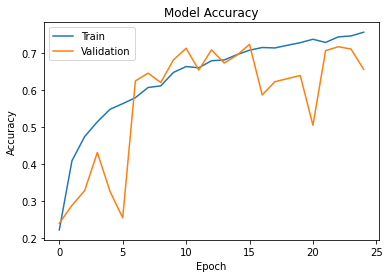

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 1.3361 - accuracy: 0.6568 - 839ms/epoch - 56ms/step


We can observe that our accuracy has improved compared to our previous model.

In [41]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 1s 61ms/step


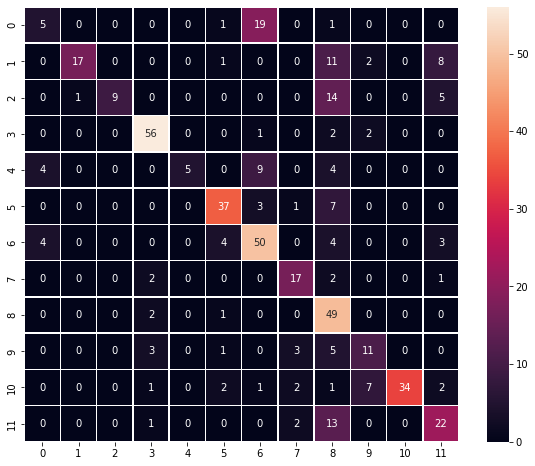

In [42]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observation:**
- The confusion matrix appears to be improving as well, however there is still some confusion with the many classes of plant species.
- The 8th class is the most confused class among all.
- We can observe that this model has outperformed our previous model.
- Thus we can say that Model 2 is our best model and we can use this model to predict and visualize some test images.

## **Visualizing the prediction:**

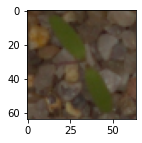

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Fat Hen']
True Label Fat Hen


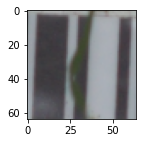

1/1 [==============================] - 0s 27ms/step
Predicted Label ['Loose Silky-bent']
True Label Black-grass


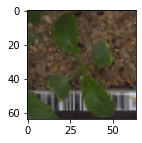

1/1 [==============================] - 0s 23ms/step
Predicted Label ['Scentless Mayweed']
True Label Charlock


In [43]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])  

## Conclusion
- We can observe the confusion matrix of the model 2 is better, because it predicted the classes better than the previous model.
- The test accuracy of the model 2 is 65%.
- Data Augmentation has helped in improving the model.


In [44]:
pd.DataFrame({'Models':['Base CNN Model','CNN Model with Data Augmentation'],'Train Accuracy':['29%','75%'],'Test Accuracy':['36%','65%']})

Models Train Accuracy Test Accuracy
0                    Base CNN Model            29%           36%
1  CNN Model with Data Augmentation            75%           65%

## Scope of Improvement

- These models can be further improved by training with different filter sizes and different number of filters. 
- These models can also be trained on the original image_size i.e 128 x 128 rather than being reduced to 64.
- Data Augmentation can be performed more and dropout_rate can be changed to improve the model performance.
- Transfer Learning architectures can also be used to train the CNN model and these models can be used for classification.